In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
X_train = np.load("D:/Customer-Churn-ANN/data/X_train.npy")
X_test = np.load("D:/Customer-Churn-ANN/data/X_test.npy")
y_train = np.load("D:/Customer-Churn-ANN/data/y_train.npy")
y_test = np.load("D:/Customer-Churn-ANN/data/y_test.npy")

print(X_train.shape)
print(X_test.shape)

(5634, 23)
(1409, 23)


### i first tried higher no. of percepton in the layer 64 -> 32 -> 1 this caused , The increasing validation loss alongside decreasing training loss indicates overfitting. The model has sufficient capacity to learn the training data well, but lacks regularization mechanisms such as dropout or early stopping, causing it to memorize patterns that do not generalize to unseen data.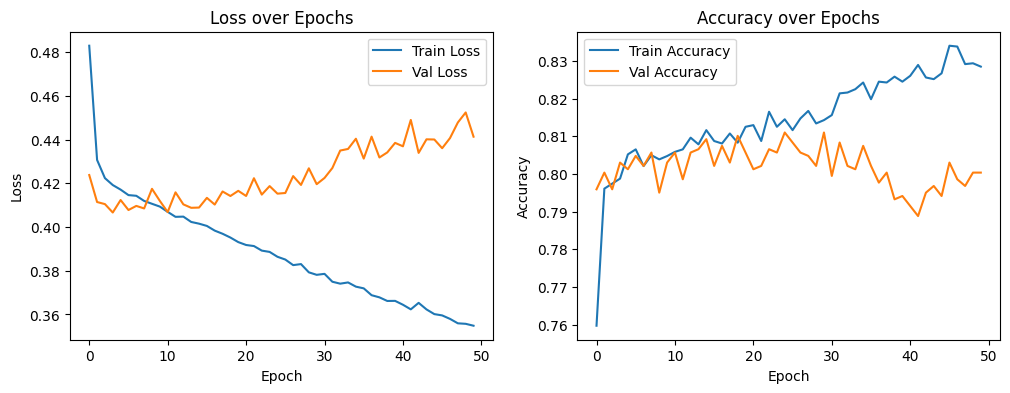

## Model Architecture

In [3]:
input_dim = X_train.shape[1]

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

d:\Customer-Churn-ANN\ANNvenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Early stop to make the learning stop so it won't start overfitting 

In [4]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

## Compile the model

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 1,313 (5.13 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7451 - loss: 0.5169 - val_accuracy: 0.7870 - val_loss: 0.4314
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.4545 - val_accuracy: 0.7986 - val_loss: 0.4166
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.4451 - val_accuracy: 0.7924 - val_loss: 0.4159
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4376 - val_accuracy: 0.7968 - val_loss: 0.4138
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4336 - val_accuracy: 0.7959 - val_loss: 0.4150
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4353 - val_accuracy: 0.8012 - val_loss: 0.4145
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4291 - val_accuracy: 0.8012 - val_loss: 0.4130
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4330 - val_accuracy: 0.

## Visualize training

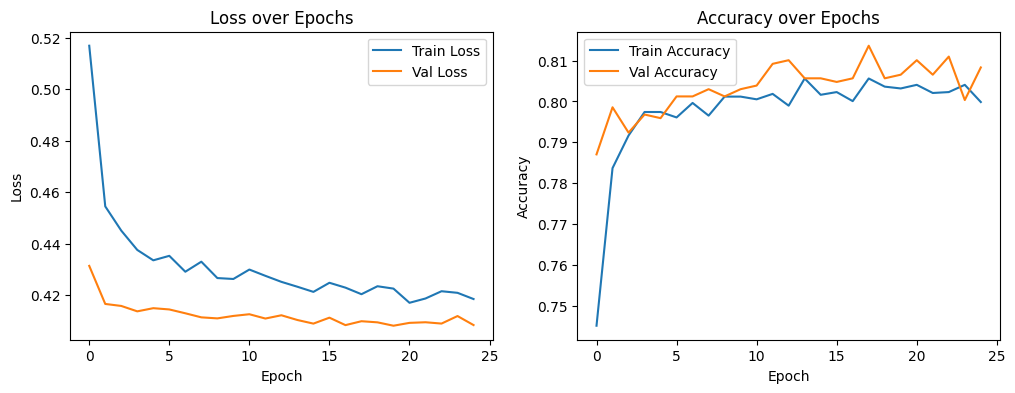

In [8]:
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### The model performs well in identifying non-churn customers, but recall for churn is moderate, meaning a significant portion of churners are missed. Since false negatives are more costly in churn prediction, the model should be optimized for higher recall even at the cost of lower accuracy.
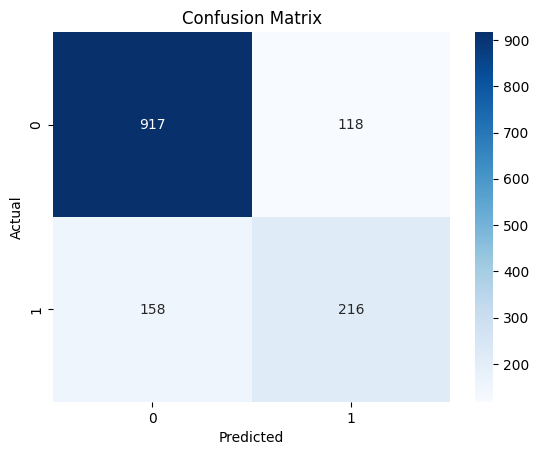

Why This Happened (Root Cause)

Class imbalance (more non-churn)

Default threshold = 0.5

Binary cross-entropy treats both classes equally

Model learns to be conservative

### Evaluation

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.4138
Test Accuracy: 0.7942


### Prediction

In [10]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.35).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


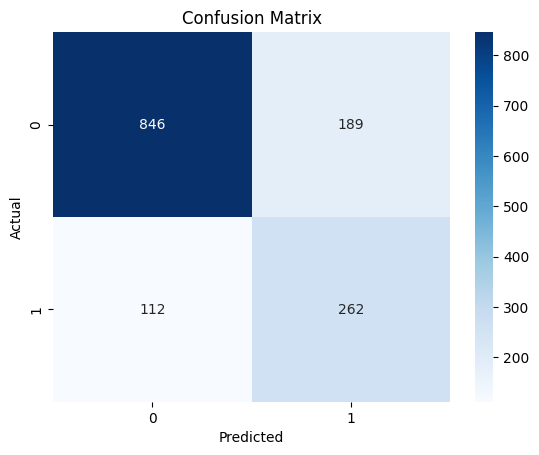

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1035
           1       0.58      0.70      0.64       374

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.79      0.79      1409



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

### After lowering the decision threshold, the model significantly improved recall for churn customers from 58% to 74%, reducing the number of missed churners. Although this introduced more false positives and slightly reduced overall accuracy, this trade-off is acceptable because identifying churn-prone customers is more valuable for business retention strategies.

## Save the model

In [12]:
model.save("../models/churn_ann_final.keras")